# Part 1 - Web Scraping with Python

More often than not data published on the web are not available in a structured dataset such as those we used in the other labs. Retrieving data requires going through the web pages, examine the [HTML](https://www.w3schools.com/html/), the standard markdown language for web pages, and extract the information. This technique is also known as [Web Scraping](https://en.wikipedia.org/wiki/Web_scraping). The main difficult relies on the fact that the goal of HTML is to format the data so that it can be viewed by humans and not machines. HTML does not provide a clear paradigm on the how to include structured data. Therefore the task of automated extraction of data and creation of a structured dataset can become complicated.

### Retrieving web resources

We start by a simple example by retrieving a page from wikipedia.

In [5]:
import requests

url = 'https://en.wikipedia.org/wiki/Web_scraping'
response = requests.get(url)

In this lab we will work with [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), a Python library for pulling data out of HTML and XML files.

In [3]:
from bs4 import BeautifulSoup

BeautifulSoup supports different types of parsers to provide idiomatic ways of navigating, searching, and modifying the web resources depending on the markup language used to format them.

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')

We are now ready to search the processed HTML page. We start by looking the text elements of the page by examining the [paragraph tag](https://www.w3schools.com/tags/tag_p.asp).

In [8]:
for par in soup.select('p'):
    print(par.text)

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites.[1] Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.

Web scraping a web page involves fetching it and extracting from it.[1][2] Fetching is the downloading of a page (which a browser does when you view the page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Once fetched, then extraction can take place. The content of a page may be parsed, searched, reformatted, its data copied into a spreadsheet, and so on. Web scrapers typically tak

In a similar way we can select different types of tags and retrieve all the tags of this particular type that are included in the page.

In [9]:
for ulist in soup.select('ul'):
    print(ulist.text)


1 History
2 Techniques

2.1 Human copy-and-paste
2.2 Text pattern matching
2.3 HTTP programming
2.4 HTML parsing
2.5 DOM parsing
2.6 Vertical aggregation
2.7 Semantic annotation recognizing
2.8 Computer vision web-page analysis


3 Software

3.1 Example tools

3.1.1 Javascript tools
3.1.2 Web crawling frameworks




4 Legal issues

4.1 United States
4.2 The EU
4.3 Australia


5 Methods to prevent web scraping
6 See also
7 References


2.1 Human copy-and-paste
2.2 Text pattern matching
2.3 HTTP programming
2.4 HTML parsing
2.5 DOM parsing
2.6 Vertical aggregation
2.7 Semantic annotation recognizing
2.8 Computer vision web-page analysis


3.1 Example tools

3.1.1 Javascript tools
3.1.2 Web crawling frameworks




3.1.1 Javascript tools
3.1.2 Web crawling frameworks


4.1 United States
4.2 The EU
4.3 Australia

After the birth of World Wide Web in 1989, the First web robot - World Wide Web Wanderer was created in 1993,June, which was intended only to measure the size of the web.
In 1993,

Each tag, apart from its basic type, it contains a set of attributes.

In [12]:
type(soup.head)

bs4.element.Tag

In [14]:
soup.head

<head>
<meta charset="utf-8"/>
<title>Web scraping - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Web_scraping","wgTitle":"Web scraping","wgCurRevisionId":919618553,"wgRevisionId":919618553,"wgArticleId":2696619,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Danish-language sources (da)","Articles needing additional references from June 2017","All articles needing additional references","Articles needing additional references from October 2018","Articles with limited geographic scope from October 2015","USA-centric","Web scraping"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","Sept

The contents of a tag are called the **children** of a tag. A tag’s children are available in a list called __.contents:

In [16]:
soup.head.contents[1]

<meta charset="utf-8"/>

In [17]:
len(soup.head.contents)

49

We can retrieve tags maching a specific type using the **find_all** method.

In [27]:
for link in soup.find_all('a'):
    print(type(link), link.attrs)

<class 'bs4.element.Tag'> {'id': 'top'}
<class 'bs4.element.Tag'> {'class': ['mw-jump-link'], 'href': '#mw-head'}
<class 'bs4.element.Tag'> {'class': ['mw-jump-link'], 'href': '#p-search'}
<class 'bs4.element.Tag'> {'href': '/wiki/File:Question_book-new.svg', 'class': ['image']}
<class 'bs4.element.Tag'> {'href': '/wiki/Wikipedia:Verifiability', 'title': 'Wikipedia:Verifiability'}
<class 'bs4.element.Tag'> {'class': ['external', 'text'], 'href': 'https://en.wikipedia.org/w/index.php?title=Web_scraping&action=edit'}
<class 'bs4.element.Tag'> {'href': '/wiki/Help:Introduction_to_referencing_with_Wiki_Markup/1', 'title': 'Help:Introduction to referencing with Wiki Markup/1'}
<class 'bs4.element.Tag'> {'rel': ['nofollow'], 'class': ['external', 'text'], 'href': '//www.google.com/search?as_eq=wikipedia&q=%22Web+scraping%22'}
<class 'bs4.element.Tag'> {'rel': ['nofollow'], 'class': ['external', 'text'], 'href': '//www.google.com/search?tbm=nws&q=%22Web+scraping%22+-wikipedia'}
<class 'bs4.el

The find_all() method looks through a tag’s descendants and retrieves all descendants that match your filters.

In [29]:
for link in soup.find_all('a', 'interlanguage-link-target'):
    print(type(link), link.attrs)

<class 'bs4.element.Tag'> {'href': 'https://ar.wikipedia.org/wiki/%D8%A7%D8%B3%D8%AA%D8%AE%D9%84%D8%A7%D8%B5_%D8%A7%D9%84%D9%85%D9%88%D8%A7%D9%82%D8%B9', 'title': 'استخلاص المواقع – Arabic', 'lang': 'ar', 'hreflang': 'ar', 'class': ['interlanguage-link-target']}
<class 'bs4.element.Tag'> {'href': 'https://ca.wikipedia.org/wiki/Web_scraping', 'title': 'Web scraping – Catalan', 'lang': 'ca', 'hreflang': 'ca', 'class': ['interlanguage-link-target']}
<class 'bs4.element.Tag'> {'href': 'https://de.wikipedia.org/wiki/Screen_Scraping', 'title': 'Screen Scraping – German', 'lang': 'de', 'hreflang': 'de', 'class': ['interlanguage-link-target']}
<class 'bs4.element.Tag'> {'href': 'https://es.wikipedia.org/wiki/Web_scraping', 'title': 'Web scraping – Spanish', 'lang': 'es', 'hreflang': 'es', 'class': ['interlanguage-link-target']}
<class 'bs4.element.Tag'> {'href': 'https://eu.wikipedia.org/wiki/Web_scraping', 'title': 'Web scraping – Basque', 'lang': 'eu', 'hreflang': 'eu', 'class': ['interlangu

In [30]:
for link in soup.find_all('a', attrs={"title": "Web service"}):
    print(type(link), link.attrs)

<class 'bs4.element.Tag'> {'href': '/wiki/Web_service', 'title': 'Web service'}


# Part 2 - Retrieving Data on Non-competitive Timed Races

We will work with [ParkRun](https://www.theguardian.com/lifeandstyle/2019/oct/04/parkrun-at-15-bigger-more-global-and-slower-than-ever), free, weekly, timed events across the world, organised by local volunteers. Every week, more than 350,000 people take to their local green space for the free, timed 5km (3.1-mile) parkrun, expecting to reap the health benefits. 

The central website https://www.parkrun.com/ provides links to national-level websites, where each week, the results of the timed events are published.

### Extract Countries

The web page https://www.parkrun.com/countries/ lists the countries where ParkRun events are organized. We will retrieve the contents of the page and scrap the list of countries.

After inspecting the page with our favorite web browser, we realize that each country is described within a separate [div tag](https://www.w3schools.com/tags/tag_div.asp) of _class_ __"section-wrap"__.

    <div class="section-wrap">
        <a href="http://www.parkrun.us/" class="img-link"><div class="img" style="background: transparent url(https://images.parkrun.com/website/group/flags/parkrun-flag-usa-fallback.png);background: rgba(255,255,255, 0) url(https://images.parkrun.com/website/group/flags/parkrun-flag-usa.svg);"></div></a>
        <h2 class="article-title">USA</h2>
        <p style="height: 130px;">Formed June 2012 at Livonia, Michigan with 28 people in attendance. Recent events are Clermont, Florida and Durham, North Carolina.</p>
        <a href="http://www.parkrun.us/" class="button green">Visit</a>
    </div>

Here the name of each country is under a [h2 tag](https://www.w3schools.com/tags/tag_hn.asp) and the URL of the corresponding website is included within an [a tags](https://www.w3schools.com/tags/tag_a.asp).

In [37]:
countries_url = 'https://www.parkrun.com/countries/'
countries_response = requests.get(countries_url)

Let's examine the output.

In [38]:
countries_response.text

'\n <?xml version="1.0" encoding="utf-8"?>\n <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\n  "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n <html>\n   <head>\n     <title>403 Please don\'t scrape. See <a href=\'http://www.parkrun.com/scraping\'>http://www.parkrun.com/scraping</a> for details.</title>\n   </head>\n   <body>\n        <img src="https://images.parkrun.com/website/general/PR_Logo_Web_White.png">\n        <h1>Ooops!</h1>\nFull technical details below, but unfortunately our website is having difficulty serving your request.<p>This could be because we are applying an update, or because there\'s a problem with our systems, or how our systems handle your request.<p>Please bear with us, but if symptoms persist, please drop us an email at <a href="mailto:support@parkrun.com?subject=403 Error on parkrun website">support@parkrun.com</a>, including the following details and what you were doing that led to this error.<p>Regards<p>The parkrun technical team<br><a hr

Unfortunately they do not want us to web scrap their website. How do they know that we are not humans?

This is done throught he so-called [User-Agent](https://www.w3.org/Protocols/rfc2616/rfc2616-sec14.html) attribute of a HTTP request. The [User-Agent request header](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/User-Agent) contains a characteristic string that allows the network protocol peers to identify the application type, operating system, software vendor or software version of the requesting software user agent.

The _requests.get_ method allows us to modify the user-agent.

In [39]:
headers = {'User-Agent': 'Mozilla/5.0 (Linux; Android 5.1.1; SM-G928X Build/LMY47X) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.83 Mobile Safari/537.36'}
countries_response = requests.get(countries_url, headers=headers)

In [40]:
countries_soup = BeautifulSoup(countries_response.text, 'html.parser')

After inspecting the code with our favorite browser, 

We are now ready to retrieve the [div tag](https://www.w3schools.com/tags/tag_div.asp) of _class_ __"section-wrap"__ of the page.

In [54]:
for div in countries_soup.find_all('div', "section-wrap"):
    print(div.contents)

['\n', <a class="img-link" href="http://www.parkrun.com.au/"><div class="img" style="background: transparent url(https://images.parkrun.com/website/group/flags/parkrun-flag-au-fallback.png);background: rgba(255,255,255, 0) url(https://images.parkrun.com/website/group/flags/parkrun-flag-au.svg);"></div></a>, '\n', <h2 class="article-title">Australia</h2>, '\n', <p>parkrun launched in Australia at Main Beach on the Gold Coast on 2 April 2011 with 108 runners, including the great Ron Clarke AO MBE in attendance.</p>, '\n', <a class="button green" href="http://www.parkrun.com.au/">Visit</a>, '\n']
['\n', <a class="img-link" href="http://www.parkrun.ca"><div class="img" style="background: transparent url();background: rgba(255,255,255, 0) url(https://images.parkrun.com/website/group/flags/parkrun-flag-ca.svg);"></div></a>, '\n', <h2 class="article-title">Canada</h2>, '\n', <p>parkrun Canada launched in the heart of the Rocky Mountains in August 2016, and continues to ignite passion for runn

The _children_ method provides access to the tag and not the HTML, as done by the _contents_ method. This makes it easier to extract the info we look for.

In [59]:
for div in countries_soup.find_all('div', "section-wrap"):
    for tag in div.children:
        print(type(tag), tag)

<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <a class="img-link" href="http://www.parkrun.com.au/"><div class="img" style="background: transparent url(https://images.parkrun.com/website/group/flags/parkrun-flag-au-fallback.png);background: rgba(255,255,255, 0) url(https://images.parkrun.com/website/group/flags/parkrun-flag-au.svg);"></div></a>
<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <h2 class="article-title">Australia</h2>
<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <p>parkrun launched in Australia at Main Beach on the Gold Coast on 2 April 2011 with 108 runners, including the great Ron Clarke AO MBE in attendance.</p>
<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <a class="button green" href="http://www.parkrun.com.au/">Visit</a>
<class 'bs4.element.NavigableString'> 

<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <a class="img-link" href="http://www.parkrun.ca"><div class="img

We narrow down the search to Tag objects. We will extract the URL of the country site by looking for tags with _class_ __['button', 'green']__ and the name of the country by looking for tags with _class_ __'article-title'__

In [65]:
import bs4

In [83]:
for div in countries_soup.find_all('div', "section-wrap"):
    for tag in div.children:
        if isinstance(tag, bs4.element.Tag):
            if tag.get("class") == ['button', 'green']:
                print(tag.get("href"))
            elif tag.get("class") == ['article-title']:
                print(tag.text)

Australia
http://www.parkrun.com.au/
Canada
http://www.parkrun.ca
Denmark
http://www.parkrun.dk/
Eswatini
https://www.parkrun.co.za/events/#8.06/-26.52/31.463
Finland
http://www.parkrun.fi/
France
http://www.parkrun.fr
Germany
http://www.parkrun.com.de
Ireland
http://www.parkrun.ie/
Italy
http://www.parkrun.it
Japan
https://www.parkrun.jp
Malaysia
http://www.parkrun.my/
Namibia
https://www.parkrun.co.za/events/#5.18/-23.071/16.756
Netherlands
https://blog.parkrun.com/nl/2019/09/12/parkrun-netherlands-coming-soon
New Zealand
http://www.parkrun.co.nz/
Norway
http://www.parkrun.no/
Poland
http://www.parkrun.pl/
Russia
http://www.parkrun.ru/
Singapore
http://www.parkrun.sg/
South Africa
http://www.parkrun.co.za/
Sweden
http://www.parkrun.se
United Kingdom
http://www.parkrun.org.uk/
USA
http://www.parkrun.us/


Now we are ready to start constructing our dataset.

In [84]:
countries_dict = {}

In [87]:
for div in countries_soup.find_all('div', "section-wrap"):
    country_name = ''
    country_url = ''
    for tag in div.children:
        if isinstance(tag, bs4.element.Tag):            
            if tag.get("class") == ['button', 'green']:
                country_url = tag.get("href")
            elif tag.get("class") == ['article-title']:
                country_name =tag.text
    
    countries_dict[country_name] = country_url

In [88]:
countries_dict

{'Australia': 'http://www.parkrun.com.au/',
 'Canada': 'http://www.parkrun.ca',
 'Denmark': 'http://www.parkrun.dk/',
 'Eswatini': 'https://www.parkrun.co.za/events/#8.06/-26.52/31.463',
 'Finland': 'http://www.parkrun.fi/',
 'France': 'http://www.parkrun.fr',
 'Germany': 'http://www.parkrun.com.de',
 'Ireland': 'http://www.parkrun.ie/',
 'Italy': 'http://www.parkrun.it',
 'Japan': 'https://www.parkrun.jp',
 'Malaysia': 'http://www.parkrun.my/',
 'Namibia': 'https://www.parkrun.co.za/events/#5.18/-23.071/16.756',
 'Netherlands': 'https://blog.parkrun.com/nl/2019/09/12/parkrun-netherlands-coming-soon',
 'New Zealand': 'http://www.parkrun.co.nz/',
 'Norway': 'http://www.parkrun.no/',
 'Poland': 'http://www.parkrun.pl/',
 'Russia': 'http://www.parkrun.ru/',
 'Singapore': 'http://www.parkrun.sg/',
 'South Africa': 'http://www.parkrun.co.za/',
 'Sweden': 'http://www.parkrun.se',
 'USA': 'http://www.parkrun.us/',
 'United Kingdom': 'http://www.parkrun.org.uk/'}

We notice that some countries do not feature a separate site. We wish exclude these countries. 

These countries include the word "events" within the HREF attribute.

We also wish to exclude countries that coming soon. These countries include the word "coming-soon" within the HREF attribute.

In [98]:
excluded = ['events', 'coming-soon']

In [100]:
for (country_name, country_url) in countries_dict.items():
    if any(x in country_url for x in excluded):
        del countries_dict[country_name]

RuntimeError: dictionary changed size during iteration

This happens because mydict.keys() returns an iterator not a list. As pointed out in comments simply convert mydict.keys() to a list by list(mydict.keys()) and it should work. [Check here](https://stackoverflow.com/questions/5384914/how-to-delete-items-from-a-dictionary-while-iterating-over-it)

In [102]:
for (country_name, country_url) in list(countries_dict.items()):
    if any(x in country_url for x in excluded):
        del countries_dict[country_name]

In [103]:
countries_dict

{'Australia': 'http://www.parkrun.com.au/',
 'Canada': 'http://www.parkrun.ca',
 'Denmark': 'http://www.parkrun.dk/',
 'Finland': 'http://www.parkrun.fi/',
 'France': 'http://www.parkrun.fr',
 'Germany': 'http://www.parkrun.com.de',
 'Ireland': 'http://www.parkrun.ie/',
 'Italy': 'http://www.parkrun.it',
 'Japan': 'https://www.parkrun.jp',
 'Malaysia': 'http://www.parkrun.my/',
 'New Zealand': 'http://www.parkrun.co.nz/',
 'Norway': 'http://www.parkrun.no/',
 'Poland': 'http://www.parkrun.pl/',
 'Russia': 'http://www.parkrun.ru/',
 'Singapore': 'http://www.parkrun.sg/',
 'South Africa': 'http://www.parkrun.co.za/',
 'Sweden': 'http://www.parkrun.se',
 'USA': 'http://www.parkrun.us/',
 'United Kingdom': 'http://www.parkrun.org.uk/'}

In [104]:
len(countries_dict)

19

### Extract Events for a specific country

Let's visit a specific country - say the first, Australia. We examine the page https://www.parkrun.com.au/events/events

Looking into the source of the page, the map component is based on [MapBox](https://www.mapbox.com/), an open-source map and location component for developers. 

After examining carefuly the source, we notice also that the information related to the events are provided from an external web resource:

    <script type='text/javascript'>
    /* <![CDATA[ */
    var parkrun_mapboxgl_map_params = {"accessToken":"pk.eyJ1IjoicGFya3J1biIsImEiOiJjanh4ZTJwZ3UwbmYxM2NwODF1YzRjZXpxIn0.ES9U7ZIiSNAY6Wpqi2HVDw","eventsjson":"https:\/\/images.parkrun.com\/events.json","language":"en","countrycode":"3","showSeriesFilter":"1","initialFilter":"1"};
    /* ]]> */
    </script>
    
In particular notice the URL https://images.parkrun.com/events.json 

This is a JSON file containing all the countries and events.

In [108]:
events_response = requests.get('https://images.parkrun.com/events.json', headers=headers)

In [106]:
import json

In [109]:
events_dict = json.loads(events_response.text)

In [123]:
events_dict.keys()

dict_keys(['countries', 'events'])

#### Let's start by examining the countries.

In [124]:
events_dict['countries']

{'14': {'bounds': [-123.650306, 42.990553, -63.661271, 56.730253],
  'url': 'www.parkrun.ca'},
 '23': {'bounds': [8.442703, 55.474609, 12.635341, 56.987144],
  'url': 'www.parkrun.dk'},
 '3': {'bounds': [114.613067, -43.163256, 153.576356, -12.376205],
  'url': 'www.parkrun.com.au'},
 '30': {'bounds': [23.759243, 60.180235, 25.538652, 61.492554],
  'url': 'www.parkrun.fi'},
 '31': {'bounds': [-0.42901, 43.564162, 6.146281, 49.44128],
  'url': 'www.parkrun.fr'},
 '32': {'bounds': [6.634672, 48.122967, 13.726508, 53.573708],
  'url': 'www.parkrun.com.de'},
 '42': {'bounds': [-10.082041, 51.551575, -6.099962, 55.140535],
  'url': 'www.parkrun.ie'},
 '44': {'bounds': [9.211192, 37.621125, 18.166117, 45.694128],
  'url': 'www.parkrun.it'},
 '46': {'bounds': [131.417682, 31.908209, 139.941344, 36.209432],
  'url': 'www.parkrun.jp'},
 '57': {'bounds': [101.698056, 2.916852, 101.733362, 3.122979],
  'url': 'www.parkrun.my'},
 '65': {'bounds': [168.356606, -46.404097, 178.018082, -35.734968],
 

Here we are missing the name of the country. We need to connect it with the dictionary we extracted from the main web site. However, the dictionary uses as key the name of the country, instead here we need to use the URL as the key.

**NOTICE: The 'http://' is missing. Also some entries at the end include a '/', which is also missing. We need to remove these. We can do this using _urlparse_**

In [149]:
from urllib import parse

In [152]:
parse.urlsplit('http://www.parkrun.sg/')

'www.parkrun.sg'

In [157]:
countries_dict_url = {}

In [158]:
for (country_name, country_url) in countries_dict.items():
    clean_url = parse.urlsplit(country_url).netloc
    countries_dict_url[clean_url] = country_name

In [159]:
countries_dict_url

{'www.parkrun.ca': 'Canada',
 'www.parkrun.co.nz': 'New Zealand',
 'www.parkrun.co.za': 'South Africa',
 'www.parkrun.com.au': 'Australia',
 'www.parkrun.com.de': 'Germany',
 'www.parkrun.dk': 'Denmark',
 'www.parkrun.fi': 'Finland',
 'www.parkrun.fr': 'France',
 'www.parkrun.ie': 'Ireland',
 'www.parkrun.it': 'Italy',
 'www.parkrun.jp': 'Japan',
 'www.parkrun.my': 'Malaysia',
 'www.parkrun.no': 'Norway',
 'www.parkrun.org.uk': 'United Kingdom',
 'www.parkrun.pl': 'Poland',
 'www.parkrun.ru': 'Russia',
 'www.parkrun.se': 'Sweden',
 'www.parkrun.sg': 'Singapore',
 'www.parkrun.us': 'USA'}

Let's merge the two datasets.

In [116]:
import pandas as pd

In [131]:
countries_data = pd.DataFrame.from_dict(events_dict['countries'], orient='index')

In [132]:
countries_data

,url,bounds
14,www.parkrun.ca,"[-123.650306, 42.990553, -63.661271, 56.730253]"
23,www.parkrun.dk,"[8.442703, 55.474609, 12.635341, 56.987144]"
3,www.parkrun.com.au,"[114.613067, -43.163256, 153.576356, -12.376205]"
30,www.parkrun.fi,"[23.759243, 60.180235, 25.538652, 61.492554]"
31,www.parkrun.fr,"[-0.42901, 43.564162, 6.146281, 49.44128]"
32,www.parkrun.com.de,"[6.634672, 48.122967, 13.726508, 53.573708]"
42,www.parkrun.ie,"[-10.082041, 51.551575, -6.099962, 55.140535]"
44,www.parkrun.it,"[9.211192, 37.621125, 18.166117, 45.694128]"
46,www.parkrun.jp,"[131.417682, 31.908209, 139.941344, 36.209432]"
57,www.parkrun.my,"[101.698056, 2.916852, 101.733362, 3.122979]"


Here we change the index as we did during the [ADM Laboratory on Databases](../lab-db/ADM%20Lab%203%20-%20Database.ipynb).

In [135]:
countries_data.reset_index(inplace=True)

In [138]:
countries_data.set_index('url', inplace=True)

In [139]:
countries_data

,index,bounds
url,,
www.parkrun.ca,14,"[-123.650306, 42.990553, -63.661271, 56.730253]"
www.parkrun.dk,23,"[8.442703, 55.474609, 12.635341, 56.987144]"
www.parkrun.com.au,3,"[114.613067, -43.163256, 153.576356, -12.376205]"
www.parkrun.fi,30,"[23.759243, 60.180235, 25.538652, 61.492554]"
www.parkrun.fr,31,"[-0.42901, 43.564162, 6.146281, 49.44128]"
www.parkrun.com.de,32,"[6.634672, 48.122967, 13.726508, 53.573708]"
www.parkrun.ie,42,"[-10.082041, 51.551575, -6.099962, 55.140535]"
www.parkrun.it,44,"[9.211192, 37.621125, 18.166117, 45.694128]"
www.parkrun.jp,46,"[131.417682, 31.908209, 139.941344, 36.209432]"


In [160]:
countries_name = pd.DataFrame.from_dict(countries_dict_url, orient='index')

In [161]:
countries_name

,0
www.parkrun.com.au,Australia
www.parkrun.ca,Canada
www.parkrun.dk,Denmark
www.parkrun.fi,Finland
www.parkrun.fr,France
www.parkrun.com.de,Germany
www.parkrun.ie,Ireland
www.parkrun.it,Italy
www.parkrun.jp,Japan
www.parkrun.my,Malaysia


In [162]:
countries_data['country'] = countries_name

In [163]:
countries_data

,index,bounds,country
url,,,
www.parkrun.ca,14,"[-123.650306, 42.990553, -63.661271, 56.730253]",Canada
www.parkrun.dk,23,"[8.442703, 55.474609, 12.635341, 56.987144]",Denmark
www.parkrun.com.au,3,"[114.613067, -43.163256, 153.576356, -12.376205]",Australia
www.parkrun.fi,30,"[23.759243, 60.180235, 25.538652, 61.492554]",Finland
www.parkrun.fr,31,"[-0.42901, 43.564162, 6.146281, 49.44128]",France
www.parkrun.com.de,32,"[6.634672, 48.122967, 13.726508, 53.573708]",Germany
www.parkrun.ie,42,"[-10.082041, 51.551575, -6.099962, 55.140535]",Ireland
www.parkrun.it,44,"[9.211192, 37.621125, 18.166117, 45.694128]",Italy
www.parkrun.jp,46,"[131.417682, 31.908209, 139.941344, 36.209432]",Japan


We can now re-index the dataframe.

In [164]:
countries_data.reset_index(inplace=True)
countries_data.set_index('index', inplace=True)

In [165]:
countries_data

,url,bounds,country
index,,,
14,www.parkrun.ca,"[-123.650306, 42.990553, -63.661271, 56.730253]",Canada
23,www.parkrun.dk,"[8.442703, 55.474609, 12.635341, 56.987144]",Denmark
3,www.parkrun.com.au,"[114.613067, -43.163256, 153.576356, -12.376205]",Australia
30,www.parkrun.fi,"[23.759243, 60.180235, 25.538652, 61.492554]",Finland
31,www.parkrun.fr,"[-0.42901, 43.564162, 6.146281, 49.44128]",France
32,www.parkrun.com.de,"[6.634672, 48.122967, 13.726508, 53.573708]",Germany
42,www.parkrun.ie,"[-10.082041, 51.551575, -6.099962, 55.140535]",Ireland
44,www.parkrun.it,"[9.211192, 37.621125, 18.166117, 45.694128]",Italy
46,www.parkrun.jp,"[131.417682, 31.908209, 139.941344, 36.209432]",Japan


#### Let's examine the events

We look the contents of the dictionary for the 'events' key.

In [171]:
events_dict['events'].keys()

dict_keys(['type', 'features'])

In [172]:
events_dict['events']['type']

'FeatureCollection'

The 'type' key does not include any valuable information. While the 'features' key contains the information needed.

In [169]:
events_dict['events']['features']

[{'geometry': {'coordinates': [-0.335791, 51.410992], 'type': 'Point'},
  'id': 1,
  'properties': {'EventLocation': 'Bushy Park, Teddington',
   'EventLongName': 'Bushy parkrun',
   'EventShortName': 'Bushy Park',
   'countrycode': 97,
   'eventname': 'bushy',
   'seriesid': 1},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-0.232215, 51.442078], 'type': 'Point'},
  'id': 2,
  'properties': {'EventLocation': 'Wimbledon Common',
   'EventLongName': 'Wimbledon Common parkrun',
   'EventShortName': 'Wimbledon Common',
   'countrycode': 97,
   'eventname': 'wimbledon',
   'seriesid': 1},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-0.184225, 51.307648], 'type': 'Point'},
  'id': 3,
  'properties': {'EventLocation': 'Banstead Woods, Coulsdon',
   'EventLongName': 'Banstead Woods parkrun',
   'EventShortName': 'Banstead Woods',
   'countrycode': 97,
   'eventname': 'banstead',
   'seriesid': 1},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-0.292886, 51.451962], 'typ

Notice that the data is included in a list.

In [173]:
len(events_dict['events']['features'])

1999

In [174]:
events_dict['events']['features'][0]

{'geometry': {'coordinates': [-0.335791, 51.410992], 'type': 'Point'},
 'id': 1,
 'properties': {'EventLocation': 'Bushy Park, Teddington',
  'EventLongName': 'Bushy parkrun',
  'EventShortName': 'Bushy Park',
  'countrycode': 97,
  'eventname': 'bushy',
  'seriesid': 1},
 'type': 'Feature'}

Notice that the dictionary includes a second dictionary under the key 'properties'. This is a _nested_ dictionary. The information inside this nested dictionary are the ones we need.

In [175]:
events_frame = pd.DataFrame(events_dict['events']['features'])

In [176]:
events_frame.head()

,geometry,id,properties,type
0,"{'type': 'Point', 'coordinates': [-0.335791, 5...",1,"{'eventname': 'bushy', 'EventLongName': 'Bushy...",Feature
1,"{'type': 'Point', 'coordinates': [-0.232215, 5...",2,"{'eventname': 'wimbledon', 'EventLongName': 'W...",Feature
2,"{'type': 'Point', 'coordinates': [-0.184225, 5...",3,"{'eventname': 'banstead', 'EventLongName': 'Ba...",Feature
3,"{'type': 'Point', 'coordinates': [-0.292886, 5...",4,"{'eventname': 'richmond', 'EventLongName': 'Ri...",Feature
4,"{'type': 'Point', 'coordinates': [-1.560059, 5...",5,"{'eventname': 'woodhousemoor', 'EventLongName'...",Feature


So this simple conversion into a dataframe is not enough. We need to extract the data from the nested dictionary.

In [182]:
events_frame = pd.DataFrame([l['properties'] for l in events_dict['events']['features']])

In [183]:
events_frame.head()

,EventLocation,EventLongName,EventShortName,countrycode,eventname,seriesid
0,"Bushy Park, Teddington",Bushy parkrun,Bushy Park,97,bushy,1
1,Wimbledon Common,Wimbledon Common parkrun,Wimbledon Common,97,wimbledon,1
2,"Banstead Woods, Coulsdon",Banstead Woods parkrun,Banstead Woods,97,banstead,1
3,"Richmond Park, Richmond upon Thames",Richmond parkrun,Richmond Park,97,richmond,1
4,"Woodhouse Moor, Leeds",Woodhouse Moor parkrun,Woodhouse Moor,97,woodhousemoor,1


In [186]:
events_frame[ events_frame['countrycode'] == 3]

,EventLocation,EventLongName,EventShortName,countrycode,eventname,seriesid
21,"Sydney Park, St Peters, Sydney",St Peters parkrun,St Peters,3,stpeters,1
48,"Albert Park, Melbourne, Australia","Albert parkrun, Melbourne",Albert Melbourne,3,albert-melbourne,1
182,"New Farm, Brisbane",New Farm parkrun,New Farm,3,newfarm,1
192,"Main Beach, Goldcoast",Main Beach parkrun,Main Beach,3,mainbeach,1
314,"Kirra Beach, Gold Coast QLD, Australia",Kirra parkrun,Kirra,3,kirra,1
315,"50a Tully St, Carrington, Newcastle NSW",Newy parkrun,Newy,3,newy,1
329,John Knight Memorial Park,Ginninderra parkrun,Ginninderra,3,ginninderra,1
330,Tallowwood Park,Coomera parkrun,Coomera,3,coomera,1
358,Balyang Sanctuary,Balyang Sanctuary parkrun,Balyang Sanctuary,3,balyangsanctuary,1
359,George Kendell Riverside Park,Parramatta parkrun,Parramatta,3,parramatta,1


#### Extract information for an event

Now that we have constructed the list of events, let's examine one specific event to understand how to extract the data. Let's pick the very first one, the "St Peters parkrun".

The web page for this specific event is the following:

https://www.parkrun.com.au/stpeters/

The formating of the URL is https://{country_url}/{eventname}/

Under the https://www.parkrun.com.au/stpeters/results/eventhistory/ web site we get a table with all the runs for this particular event.

In [187]:
run_url = 'https://www.parkrun.com.au/stpeters/results/eventhistory/'
run_response = requests.get(run_url, headers=headers)

In [188]:
run_soup = BeautifulSoup(run_response.text, 'html.parser')

In [222]:
for row in run_soup.find_all('tr'):
    print(row)

<tr><th> </th><th> </th><th>Number</th><th>Number</th><th class="unsortable"> </th><th colspan="2">Male First Finishers</th><th class="unsortable"> </th><th colspan="2">Female First Finishers</th></tr>
<tr><th>Run</th><th>Date</th><th>parkrunners</th><th>Volunteers</th><th class="unsortable"> </th><th>parkrunner</th><th>Time</th><th class="unsortable"> </th><th>parkrunner</th><th>Time</th></tr>
<tr><td><a href="../weeklyresults/?runSeqNumber=400">400</a></td><td><a href="../weeklyresults/?runSeqNumber=400">12/10/2019</a></td><td>350</td><td>16</td><td class="bspacer"> </td><td><a href="athletehistory?athleteNumber=2689633">James BYRNE</a></td><td>00:17:30</td><td class="bspacer"> </td><td><a href="athletehistory?athleteNumber=5213627">Niamh MCMAHON</a></td><td>00:20:32</td></tr>
<tr><td><a href="../weeklyresults/?runSeqNumber=399">399</a></td><td><a href="../weeklyresults/?runSeqNumber=399">05/10/2019</a></td><td>129</td><td>17</td><td class="bspacer"> </td><td><a href="athletehistory?

We need the first 4 columns

In [230]:
for row in run_soup.find_all('tr'):
    col_count = 0
    for col in row.find_all('td'):
        if (col_count < 4):
            print(col.text)            
        col_count += 1

400
12/10/2019
350
16
399
05/10/2019
129
17
398
28/09/2019
404
14
397
21/09/2019
356
17
396
14/09/2019
350
19
395
07/09/2019
376
17
394
31/08/2019
267
16
393
24/08/2019
311
18
392
17/08/2019
362
17
391
10/08/2019
264
16
390
03/08/2019
384
18
389
27/07/2019
354
15
388
20/07/2019
365
17
387
13/07/2019
361
18
386
06/07/2019
352
15
385
29/06/2019
412
16
384
22/06/2019
325
16
383
15/06/2019
304
19
382
08/06/2019
340
16
381
01/06/2019
374
18
380
25/05/2019
375
16
379
18/05/2019
322
18
378
11/05/2019
382
17
377
04/05/2019
375
18
376
27/04/2019
369
21
375
20/04/2019
337
18
374
13/04/2019
370
20
373
06/04/2019
350
16
372
30/03/2019
113
15
371
23/03/2019
333
14
370
16/03/2019
269
17
369
09/03/2019
343
17
368
02/03/2019
317
18
367
23/02/2019
337
19
366
16/02/2019
357
16
365
09/02/2019
360
15
364
02/02/2019
260
18
363
26/01/2019
276
16
362
19/01/2019
406
15
361
12/01/2019
345
16
360
05/01/2019
283
14
359
01/01/2019
212
14
358
29/12/2018
191
17
357
22/12/2018
232
13
356
15/12/2018
234
17
355
08/12/

Let's create a new list with all the runs for this particular event.

In [243]:
run_data = []

In [245]:
for row in run_soup.find_all('tr'):
    col_count = 0
    col_runSeqNumber = 0
    col_date = ''
    col_totRunners = 0
    col_totVolunteers = 0
    for col in row.find_all('td'):                
        if col_count == 0:            
            col_runSeqNumber = col.text
            
        elif col_count == 1:
            col_date = col.text
            
        elif col_count == 2:
            col_totRunners = col.text
            
        elif col_count == 3:
            col_totVolunteers = col.text
            
            if 'unknown' in col_totVolunteers:
                col_totVolunteers = 0
            
        col_count += 1
            
    if len(col_date) > 0:        
        run_data.append({'countrycode': 3, 
                         'event': 'stpeters',
                         'date': col_date,
                         'runSeqNumber': int(col_runSeqNumber), 
                         'totRunnners': int(col_totRunners), 
                         'totVolunteers': int(col_totVolunteers)})

In [246]:
run_data

[{'countrycode': 3,
  'date': '12/10/2019',
  'event': 'stpeters',
  'runSeqNumber': 400,
  'totRunnners': 350,
  'totVolunteers': 16},
 {'countrycode': 3,
  'date': '05/10/2019',
  'event': 'stpeters',
  'runSeqNumber': 399,
  'totRunnners': 129,
  'totVolunteers': 17},
 {'countrycode': 3,
  'date': '28/09/2019',
  'event': 'stpeters',
  'runSeqNumber': 398,
  'totRunnners': 404,
  'totVolunteers': 14},
 {'countrycode': 3,
  'date': '21/09/2019',
  'event': 'stpeters',
  'runSeqNumber': 397,
  'totRunnners': 356,
  'totVolunteers': 17},
 {'countrycode': 3,
  'date': '14/09/2019',
  'event': 'stpeters',
  'runSeqNumber': 396,
  'totRunnners': 350,
  'totVolunteers': 19},
 {'countrycode': 3,
  'date': '07/09/2019',
  'event': 'stpeters',
  'runSeqNumber': 395,
  'totRunnners': 376,
  'totVolunteers': 17},
 {'countrycode': 3,
  'date': '31/08/2019',
  'event': 'stpeters',
  'runSeqNumber': 394,
  'totRunnners': 267,
  'totVolunteers': 16},
 {'countrycode': 3,
  'date': '24/08/2019',
  'e

In [247]:
run_frame = pd.DataFrame(run_data)

In [249]:
run_frame.set_index('runSeqNumber', inplace=True)

Let's have a look on the data with a simple visualization.

In [250]:
import matplotlib.pyplot

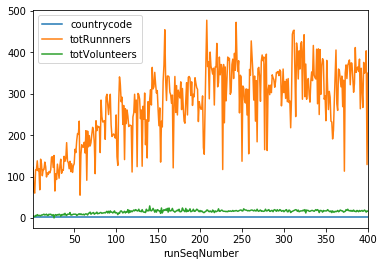

In [251]:
run_frame.plot()